<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

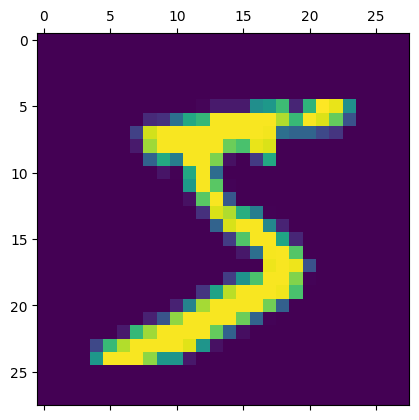

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam', histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2654 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1204 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0395 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/sgd', histogram_freq=1)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6612 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3361 - accuracy: 0.9067
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2861 - accuracy: 0.9195
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2554 - accuracy: 0.9281
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2324 - accuracy: 0.9351
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2138 - accuracy: 0.9397
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1983 - accuracy: 0.9442
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1852 - accuracy: 0.9479
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1741 - accuracy: 0.9509
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.164

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.predict(X_train)

1875/1875 [==============================] - 2s 965us/step


array([[0.46086395, 0.06681145, 0.86049676, ..., 0.7045771 , 0.27004096,
        0.22227979],
       [0.9999873 , 0.00347732, 0.9278272 , ..., 0.58970124, 0.34647685,
        0.30907923],
       [0.07220423, 0.09432016, 0.8749714 , ..., 0.65882546, 0.5007418 ,
        0.7872781 ],
       ...,
       [0.05100652, 0.30688107, 0.00658946, ..., 0.5103835 , 0.8075037 ,
        0.8519666 ],
       [0.8072701 , 0.01947275, 0.9098313 , ..., 0.30665094, 0.09541612,
        0.10808598],
       [0.9494412 , 0.02897361, 0.7267726 , ..., 0.36196965, 0.99751526,
        0.96189654]], dtype=float32)

In [21]:
model.predict(X_train[0].reshape(784, ))

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_3/dense_6/Relu' defined at (most recent call last):
    File "C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\79173\AppData\Local\Temp\ipykernel_12428\590325262.py", line 1, in <module>
      model.predict(X_train[0])
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_3/dense_6/Relu'
Matrix size-incompatible: In[0]: [32,1], In[1]: [784,100]
	 [[{{node sequential_3/dense_6/Relu}}]] [Op:__inference_predict_function_435541]

In [24]:
len(X_train)

60000

In [26]:
X_train[0].shape

(28, 28)

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [37]:
model_pred = model.predict(X_train[0].reshape(1, 784, 1))

1/1 [==============================] - 0s 24ms/step


In [42]:
np.argmax(model_pred[0])

5